# Final Project

**Submitted by Group 2:**
- Nazila Fazeli
- Sepide Aghajanpoor
- Mona Jazinaninejad
- Parisa Bagheri
- Ata Naseri

**Course: Forecasting & Predictive Analytics**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

from astsadata import *


/opt/anaconda3/lib/python3.12/site-packages/astsadata/astsadata.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  birth = pd.read_csv(f"{path}/data/birth.csv", index_col=0, parse_dates=True)
/opt/anaconda3/lib/python3.12/site-packages/astsadata/astsadata.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cardox = pd.read_csv(f"{path}/data/cardox.csv", index_col=0, parse_dates=True)
/opt/anaconda3/lib/python3.12/site-packages/astsadata/astsadata.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chicken = pd.read_csv(f"{path}/data/chicken.csv", index_col=0, parse_date

In [1]:
def acf1(x, nlags=None, acf_type='correlation', pacf=False, ax=None, return_values=False, **kwargs):
    """
    Calculate and optionally plot the autocorrelation or partial autocorrelation function.

    Parameters:
    - x: Input time series.
    - nlags: Number of lags to compute.
    - acf_type: 'correlation' for autocorrelation, 'covariance' for autocovariance.
    - pacf: If True, computes partial autocorrelation instead of autocorrelation.
    - ax: Matplotlib axis to plot on. If None, a new axis is created.
    - return_values: If True, the function will return the ACF/PACF values and lags.
    - **kwargs: Additional keyword arguments for the plot.

    Returns:
    - If return_values is True, returns (lags, values).
    """
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == 'correlation':
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = 'PACF'
    else:
        if acf_type == 'correlation':
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = 'ACF'
        elif acf_type == 'covariance':
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = 'ACoV'

    if return_values:
        return lags, values

    if ax is None:
        ax = plt.gca()

    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color='black', linewidth=1)
    if acf_type == 'correlation':
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color='red', linestyle='--', linewidth=1)
        ax.axhline(-conf_level, color='red', linestyle='--', linewidth=1)
    ax.set_xlabel('LAG')
    ax.set_ylabel(ylabel)

    return ax


In [7]:
# Step 1: Read the original CSV file
df = pd.read_csv("estat_sts_inpr_m_filtered_en.csv")

# Step 2: Keep only the 'TIME_PERIOD' and 'OBS_VALUE' columns
df_filtered = df[['TIME_PERIOD', 'OBS_VALUE']]

# Step 3: Save the filtered data to a new CSV file
output_file = "food_bev_forecasting_data.csv"
df_filtered.to_csv(output_file, index=False)

# Step 4: Load the filtered data with TIME_PERIOD as index and parse dates
Prod = pd.read_csv(output_file, index_col='TIME_PERIOD', sep=',', parse_dates=True)

# Step 5: Inspect data structure and basic info
print("Basic Info:")
print(Prod.info())
print("\nFirst 5 Rows:")
print(Prod.head())

# Step 6: Check for missing values
missing_values = Prod.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Basic Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 406 entries, 1991-01-01 to 2024-10-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OBS_VALUE  406 non-null    float64
dtypes: float64(1)
memory usage: 6.3 KB
None

First 5 Rows:
             OBS_VALUE
TIME_PERIOD           
1991-01-01        75.3
1991-02-01        68.6
1991-03-01        71.2
1991-04-01        74.7
1991-05-01        73.2

Missing Values per Column:
OBS_VALUE    0
dtype: int64


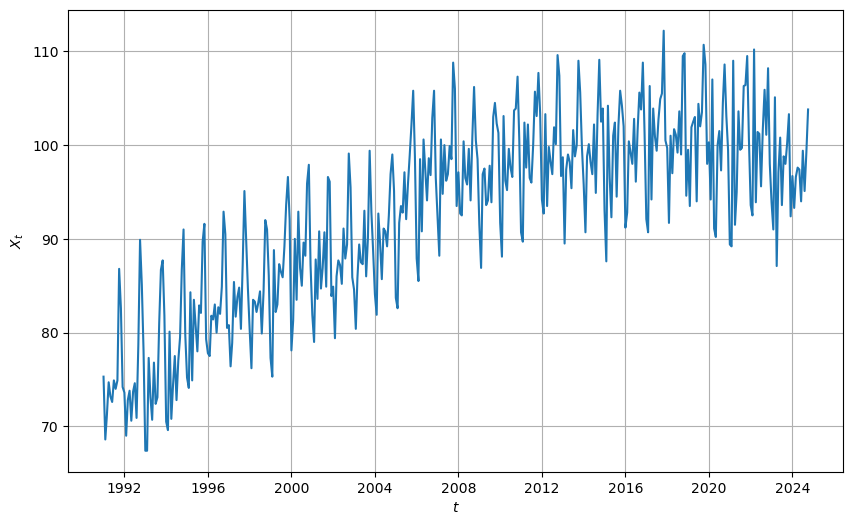

In [10]:
# Time series plot of X_t

x_ts = Prod['OBS_VALUE']

plt.figure(figsize=(10, 6)) 
plt.plot(x_ts) 
plt.xlabel('$t$') 
plt.ylabel('$X_t$') 
## plt.ticklabel_format(style='plain', axis='y')
plt.grid(True) 
plt.show()  


In [12]:
# Test the stationarity of X_t

from arch.unitroot import KPSS

# Perform KPSS test
kpss_test = KPSS(x_ts)
p_value = kpss_test.pvalue

# Print the results
print(f'p-value: {p_value:.3f}\n')

# Interpret the results
alpha = 0.05
if p_value >= alpha:
     print(f'The time series is stationary (fail to reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')
else: 
    print(f'The time series is not stationary (reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')


p-value: 0.000

The time series is not stationary (reject "H0: The time series is stationary" at a 5% significance level).


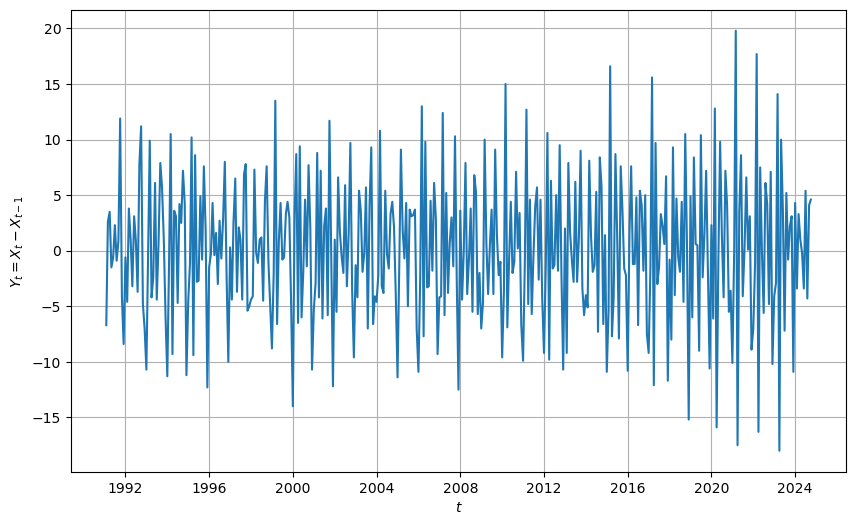

In [14]:
# Time series plot of Y_t := X_t - X_{t-1}

y_ts = Prod.diff().dropna() 

plt.figure(figsize=(10, 6)) 
plt.plot(y_ts) 
plt.xlabel('$t$') 
plt.ylabel('$Y_t = X_t - X_{t-1}$') 
plt.grid(True) 
plt.show()  


In [22]:
# Test the stationarity of Y_t

# Perform KPSS test
kpss_test = KPSS(y_ts)
p_value = kpss_test.pvalue

# Print the results
print(f'p-value: {p_value:.3f}\n')

# Interpret the results
alpha = 0.05
if p_value >= alpha:
     print(f'The time series is stationary (fail to reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')
else: 
    print(f'The time series is not stationary (reject "H0: The time series is stationary" at a {100*alpha:.0f}% significance level).')


p-value: 0.935

The time series is stationary (fail to reject "H0: The time series is stationary" at a 5% significance level).


In [24]:
# Construct the training set and test set

# Training set
u1_ts = x_ts[:-12]

# Test set
u2_ts = x_ts[-12:]


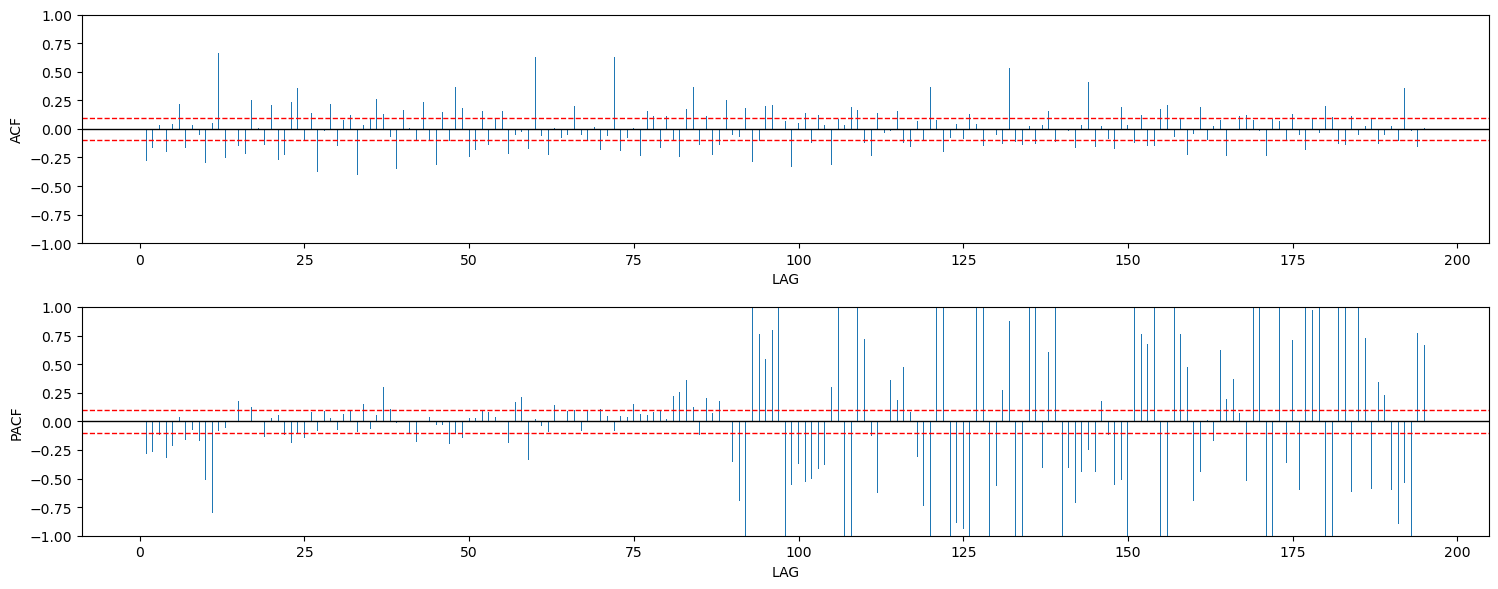

In [26]:
# Plot ACF amd PACF for (1-B)U1_t

fig, axes = plt.subplots(nrows = 2, figsize = (15,6))

acf1(u1_ts.diff().dropna(), nlags = 195, ax = axes[0], width = 0.15)
axes[0].set_ylim(-1, 1)

acf1(u1_ts.diff().dropna(), nlags = 195, ax = axes[1], width = 0.15, pacf = True)
axes[1].set_ylim(-1, 1)

fig.tight_layout()
plt.show()


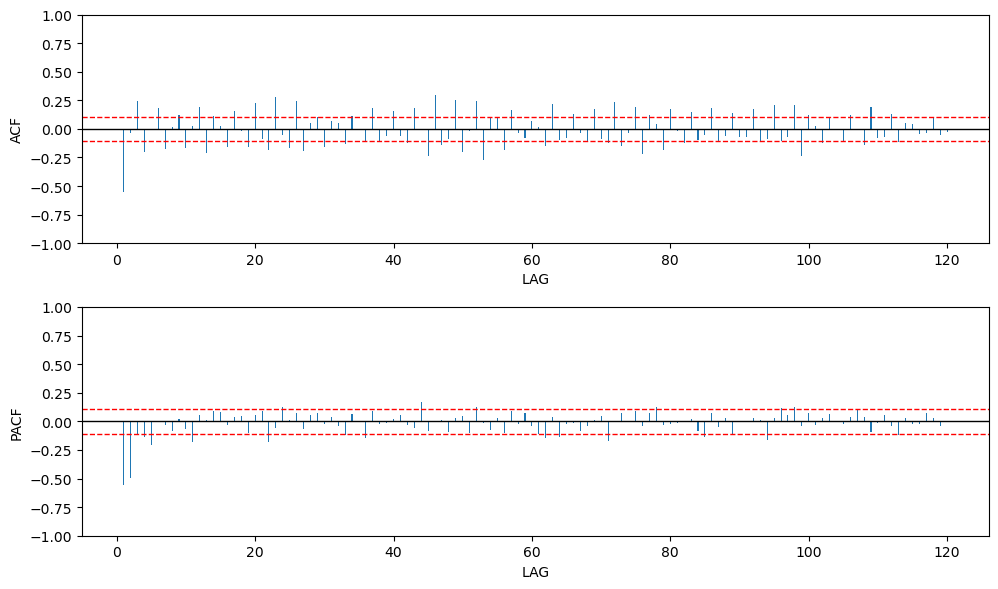

In [28]:
# Plot ACF amd PACF for (1-B^{12})(1-B)U1_t

fig, axes = plt.subplots(nrows = 2, figsize = (10,6))

acf1(u1_ts.diff().dropna().diff(60).dropna(), nlags = 120, ax = axes[0], width = 0.15)
axes[0].set_ylim(-1, 1)

acf1(u1_ts.diff().dropna().diff(60).dropna(), nlags = 120, ax = axes[1], width = 0.15, pacf = True)
axes[1].set_ylim(-1, 1)

fig.tight_layout()
plt.show()


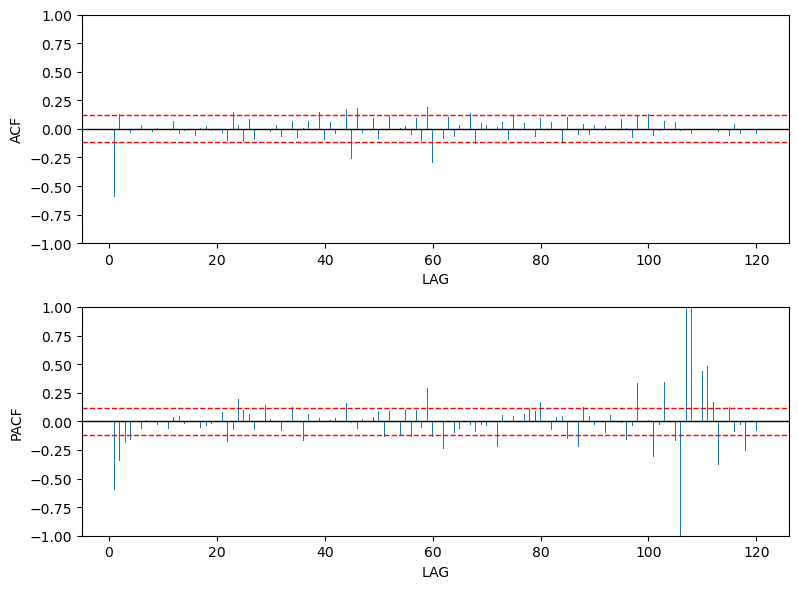

In [30]:
# Plot ACF amd PACF for (1-B^{12})(1-B)U1_t

fig, axes = plt.subplots(nrows = 2, figsize = (8,6))

acf1(u1_ts.diff().dropna().diff(60).dropna().diff(60).dropna(), nlags = 120, ax = axes[0], width = 0.15)
axes[0].set_ylim(-1, 1)

acf1(u1_ts.diff().dropna().diff(60).dropna().diff(60).dropna(), nlags = 120, ax = axes[1], width = 0.15, pacf = True)
axes[1].set_ylim(-1, 1)

fig.tight_layout()
plt.show()


- Initial Suggested Models

1. SARIMA(1,1,1)(1,1,1)_{60}
2. SARIMA(1,1,1)(1,1,0)_{60}
3. SARIMA(1,1,1)(0,1,0)_{60}
4. SARIMA(2,1,1)(1,1,1)_{60}
5. SARIMA(2,1,1)(1,1,0)_{60}
6. SARIMA(2,1,1)(0,1,0)_{60}
7. SARIMA(2,1,2)(0,1,0)_{60}
8. SARIMA(1,1,1)(1,2,1)_{60}
9. SARIMA(1,1,1)(0,2,1)_{60}
10. SARIMA(1,1,1)(2,2,2)_{60}

In [32]:
# Fit a SARIMA(1,1,1)(1,1,1)_{60} model to U1_t

model1 = sm.tsa.arima.ARIMA(u1_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 60)).fit()
print(model1.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                        OBS_VALUE   No. Observations:                  394
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 60)   Log Likelihood                -823.217
Date:                          Sat, 24 May 2025   AIC                           1656.434
Time:                                  14:08:12   BIC                           1675.475
Sample:                              01-01-1991   HQIC                          1664.026
                                   - 10-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2208      0.053     -4.128      0.000      -0.326      -0.116
ma.L1         -0.7883      0.041    -19.241      0.

In [34]:
# Fit a SARIMA(1,1,1)(1,1,0)_{60} model to U1_t

model2 = sm.tsa.arima.ARIMA(u1_ts, order=(1, 1, 1), seasonal_order=(1, 1, 0, 60)).fit()
print(model2.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         OBS_VALUE   No. Observations:                  394
Model:             ARIMA(1, 1, 1)x(1, 1, [], 60)   Log Likelihood                -823.716
Date:                           Sat, 24 May 2025   AIC                           1655.432
Time:                                   14:09:22   BIC                           1670.665
Sample:                               01-01-1991   HQIC                          1661.507
                                    - 10-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2204      0.052     -4.204      0.000      -0.323      -0.118
ma.L1         -0.7870      0.041    -19.021

In [39]:
# Fit a SARIMA(1,1,1)(0,1,0)_{60} model to U1_t

model3 = sm.tsa.arima.ARIMA(u1_ts, order=(1, 1, 1), seasonal_order=(0, 1, 0, 60)).fit()
print(model3.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         OBS_VALUE   No. Observations:                  394
Model:             ARIMA(1, 1, 1)x(0, 1, [], 60)   Log Likelihood                -823.717
Date:                           Sat, 24 May 2025   AIC                           1653.433
Time:                                   14:14:09   BIC                           1664.858
Sample:                               01-01-1991   HQIC                          1657.989
                                    - 10-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2205      0.052     -4.206      0.000      -0.323      -0.118
ma.L1         -0.7871      0.041    -19.039

In [41]:
# Fit a SARIMA(2,1,1)(1,1,1)_{60} model to U1_t

model4 = sm.tsa.arima.ARIMA(u1_ts, order=(2, 1, 1), seasonal_order=(1, 1, 1, 60)).fit()
print(model4.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                    SARIMAX Results                                     
Dep. Variable:                        OBS_VALUE   No. Observations:                  394
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 60)   Log Likelihood                -819.448
Date:                          Sat, 24 May 2025   AIC                           1650.896
Time:                                  14:15:22   BIC                           1673.745
Sample:                              01-01-1991   HQIC                          1660.007
                                   - 10-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3625      0.066     -5.495      0.000      -0.492      -0.233
ar.L2         -0.2126      0.072     -2.967      0.

In [43]:
# Fit a SARIMA(2,1,1)(1,1,0)_{60} model to U1_t

model5 = sm.tsa.arima.ARIMA(u1_ts, order=(2, 1, 1), seasonal_order=(1, 1, 0, 60)).fit()
print(model5.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         OBS_VALUE   No. Observations:                  394
Model:             ARIMA(2, 1, 1)x(1, 1, [], 60)   Log Likelihood                -820.066
Date:                           Sat, 24 May 2025   AIC                           1650.132
Time:                                   14:15:41   BIC                           1669.173
Sample:                               01-01-1991   HQIC                          1657.725
                                    - 10-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3645      0.065     -5.572      0.000      -0.493      -0.236
ar.L2         -0.2144      0.070     -3.082

In [44]:
# Fit a SARIMA(2,1,1)(0,1,0)_{60} model to U1_t

model6 = sm.tsa.arima.ARIMA(u1_ts, order=(2, 1, 1), seasonal_order=(0, 1, 0, 60)).fit()
print(model6.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         OBS_VALUE   No. Observations:                  394
Model:             ARIMA(2, 1, 1)x(0, 1, [], 60)   Log Likelihood                -820.325
Date:                           Sat, 24 May 2025   AIC                           1648.651
Time:                                   14:15:43   BIC                           1663.883
Sample:                               01-01-1991   HQIC                          1654.725
                                    - 10-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3518      0.066     -5.332      0.000      -0.481      -0.222
ar.L2         -0.1985      0.069     -2.869

In [47]:
# Fit a SARIMA(2,1,2)(0,1,0)_{60} model to U1_t

model7 = sm.tsa.arima.ARIMA(u1_ts, order=(2, 1, 2), seasonal_order=(0, 1, 0, 60)).fit()
print(model7.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         OBS_VALUE   No. Observations:                  394
Model:             ARIMA(2, 1, 2)x(0, 1, [], 60)   Log Likelihood                -817.438
Date:                           Sat, 24 May 2025   AIC                           1644.875
Time:                                   14:15:55   BIC                           1663.916
Sample:                               01-01-1991   HQIC                          1652.468
                                    - 10-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7830      0.183     -4.284      0.000      -1.141      -0.425
ar.L2         -0.3138      0.059     -5.324

In [49]:
# Fit a SARIMA(1,1,1)(1,2,1)_{60} model to U1_t

model8 = sm.tsa.arima.ARIMA(u1_ts, order=(1, 1, 1), seasonal_order=(1, 2, 1, 60)).fit()
print(model8.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                        OBS_VALUE   No. Observations:                  394
Model:             ARIMA(1, 1, 1)x(1, 2, 1, 60)   Log Likelihood                -727.950
Date:                          Sat, 24 May 2025   AIC                           1465.901
Time:                                  14:16:58   BIC                           1483.948
Sample:                              01-01-1991   HQIC                          1473.145
                                   - 10-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2282      0.065     -3.515      0.000      -0.356      -0.101
ma.L1         -0.7673      0.051    -15.075      0.

In [50]:
# Fit a SARIMA(1,1,1)(0,2,1)_{60} model to U1_t

model9 = sm.tsa.arima.ARIMA(u1_ts, order=(1, 1, 1), seasonal_order=(0, 2, 1, 60)).fit()
print(model9.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                        OBS_VALUE   No. Observations:                  394
Model:             ARIMA(1, 1, 1)x(0, 2, 1, 60)   Log Likelihood                -728.451
Date:                          Sat, 24 May 2025   AIC                           1464.903
Time:                                  14:17:44   BIC                           1479.340
Sample:                              01-01-1991   HQIC                          1470.698
                                   - 10-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2261      0.065     -3.503      0.000      -0.353      -0.100
ma.L1         -0.7633      0.052    -14.820      0.

In [51]:
# Fit a SARIMA(1,1,1)(2,2,2)_{60} model to U1_t

model10 = sm.tsa.arima.ARIMA(u1_ts, order=(1, 1, 1), seasonal_order=(2, 2, 2, 60)).fit()
print(model10.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                       SARIMAX Results                                       
Dep. Variable:                             OBS_VALUE   No. Observations:                  394
Model:             ARIMA(1, 1, 1)x(2, 2, [1, 2], 60)   Log Likelihood                -727.798
Date:                               Sat, 24 May 2025   AIC                           1469.596
Time:                                       14:23:47   BIC                           1494.862
Sample:                                   01-01-1991   HQIC                          1479.738
                                        - 10-01-2023                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2275      0.066     -3.423      0.001      -0.358      -0.097
ma.L1      

In [59]:
# Forecast and confidence boundaries

k = 12 # Number of steps to forecast
u1_ts_preds = model6.get_forecast(steps = k)

# Extract the confidence intervals
conf_int = u1_ts_preds.conf_int()

# Create a DataFrame
forecast_df = pd.DataFrame({
    'predicted_mean': u1_ts_preds.predicted_mean,
    'lower_ci': conf_int.iloc[:, 0],
    'upper_ci': conf_int.iloc[:, 1]
})


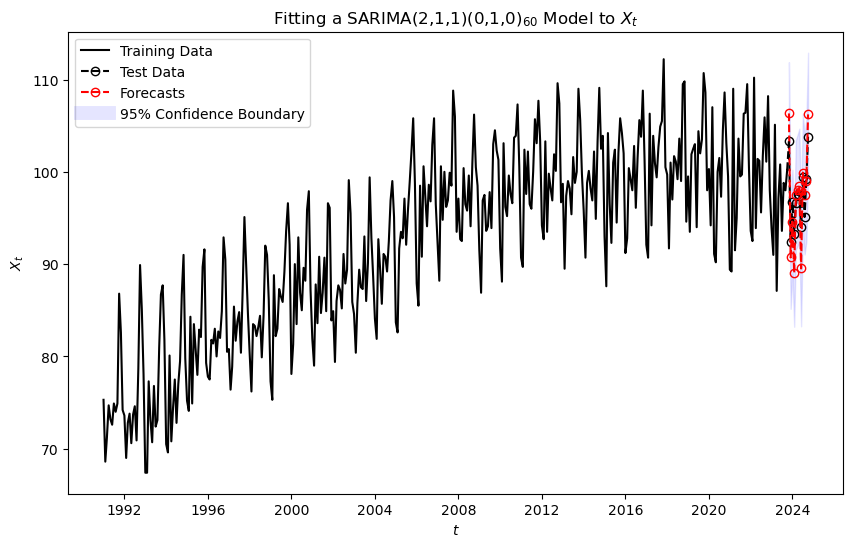

In [60]:
# Plots

from matplotlib.lines import Line2D

plt.figure(figsize = (10, 6))

# Training data plot
plt.plot(u1_ts.index, u1_ts, color='black', linestyle='-')

# Test data plot
plt.plot(u2_ts.index, u2_ts, color='black', linestyle='--', marker='o', markerfacecolor='none')

# Forecasts plot
plt.plot(forecast_df.index, forecast_df['predicted_mean'], color='red', linestyle='--', marker='o', markerfacecolor='none')

# Confidence boundary plot with lighter shading
plt.fill_between(forecast_df.index, forecast_df['lower_ci'], forecast_df['upper_ci'], color='blue', alpha=0.1)

# Connect the last point of u1_ts to the first point of u2_ts with a black dashed line
plt.plot([u1_ts.index[-1], u2_ts.index[0]], [u1_ts.iloc[-1], u2_ts.iloc[0]], 'k--')

# Custom legend elements
legend_elements = [
    Line2D([0], [0], color='black', linestyle='-', markeredgecolor='black', label='Training Data'),
    Line2D([0], [0], color='black', linestyle='--', marker='o', markerfacecolor='none', markeredgecolor='black', label='Test Data'),
    Line2D([0], [0], color='red', linestyle='--', marker='o', markerfacecolor='none', markeredgecolor='red', label='Forecasts'),
    Line2D([0], [0], color='blue', alpha=0.1, lw=10, label='95% Confidence Boundary')
]

plt.title('Fitting a SARIMA(2,1,1)(0,1,0)$_{60}$ Model to $X_t$')
plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.legend(handles=legend_elements, loc='upper left')
plt.show()

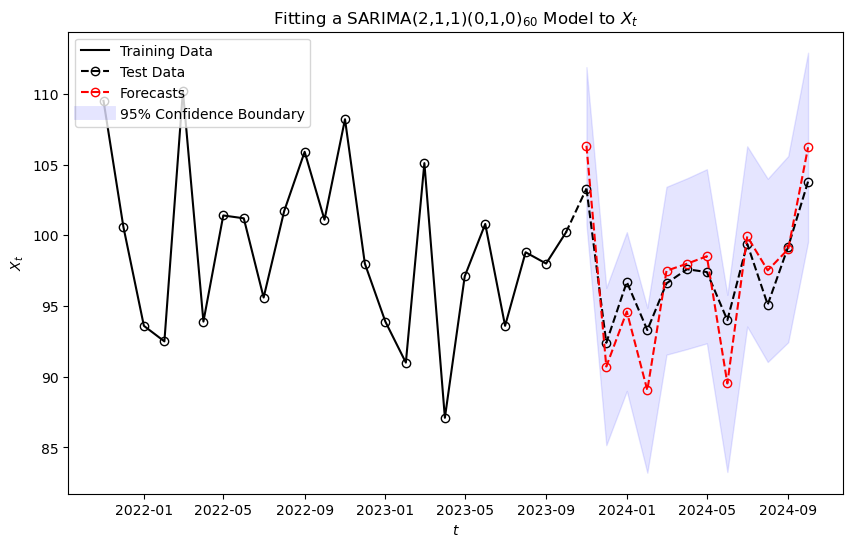

In [78]:
## Plots

plt.figure(figsize = (10, 6))

# Training data plot
plt.plot(u1_ts.index[-24:], u1_ts[-24:], color='black', linestyle='-', marker='o', markerfacecolor='none')

# Test data plot
plt.plot(u2_ts.index, u2_ts, color='black', linestyle='--', marker='o', markerfacecolor='none')

# Forecasts plot
plt.plot(forecast_df.index, forecast_df['predicted_mean'], color='red', linestyle='--', marker='o', markerfacecolor='none')

# Confidence boundary plot with lighter shading
plt.fill_between(forecast_df.index, forecast_df['lower_ci'], forecast_df['upper_ci'], color='blue', alpha=0.1)

# Connect the last point of u1_ts to the first point of u2_ts with a black dashed line
plt.plot([u1_ts.index[-1], u2_ts.index[0]], [u1_ts.iloc[-1], u2_ts.iloc[0]], 'k--')

# Custom legend elements
legend_elements = [
    Line2D([0], [0], color='black', linestyle='-', markeredgecolor='black', label='Training Data'),
    Line2D([0], [0], color='black', linestyle='--', marker='o', markerfacecolor='none', markeredgecolor='black', label='Test Data'),
    Line2D([0], [0], color='red', linestyle='--', marker='o', markerfacecolor='none', markeredgecolor='red', label='Forecasts'),
    Line2D([0], [0], color='blue', alpha=0.1, lw=10, label='95% Confidence Boundary')
]

plt.title('Fitting a SARIMA(2,1,1)(0,1,0)$_{60}$ Model to $X_t$')
plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.legend(handles=legend_elements, loc='upper left')
plt.show()


In [62]:
# Calculate the Mean Absolute Percentage Error (MAPE)

errors = np.abs((u2_ts - forecast_df['predicted_mean']) / u2_ts)
mape = np.mean(errors) * 100

print(f'The Mean Absolute Percentage Error (MAPE) is: {mape:.2f}%')


The Mean Absolute Percentage Error (MAPE) is: 2.02%
